In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.tsa import stattools

import tensorflow as tf
from tensorflow.keras import layers

mpl.rcParams['figure.figsize'] = (12, 8)
mpl.rcParams['axes.grid'] = False

sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize': (16., 12.)})

In [2]:
df = pd.read_excel('./countries_gas.xlsx', index_col=0)

In [3]:
df

,USA,"Japan,South Korea",Eupora
Date,,,
1984-01-01,59191.20,3158.67,33524.59
1984-02-01,49898.24,2902.67,32041.52
1984-03-01,53440.16,3397.67,30465.52
1984-04-01,41004.24,3065.67,23029.52
1984-05-01,35196.24,2932.67,19727.56
...,...,...,...
2020-08-01,65728.00,12880.00,28154.50
2020-09-01,57408.00,11753.00,32761.60
2020-10-01,61568.00,12075.00,37880.60


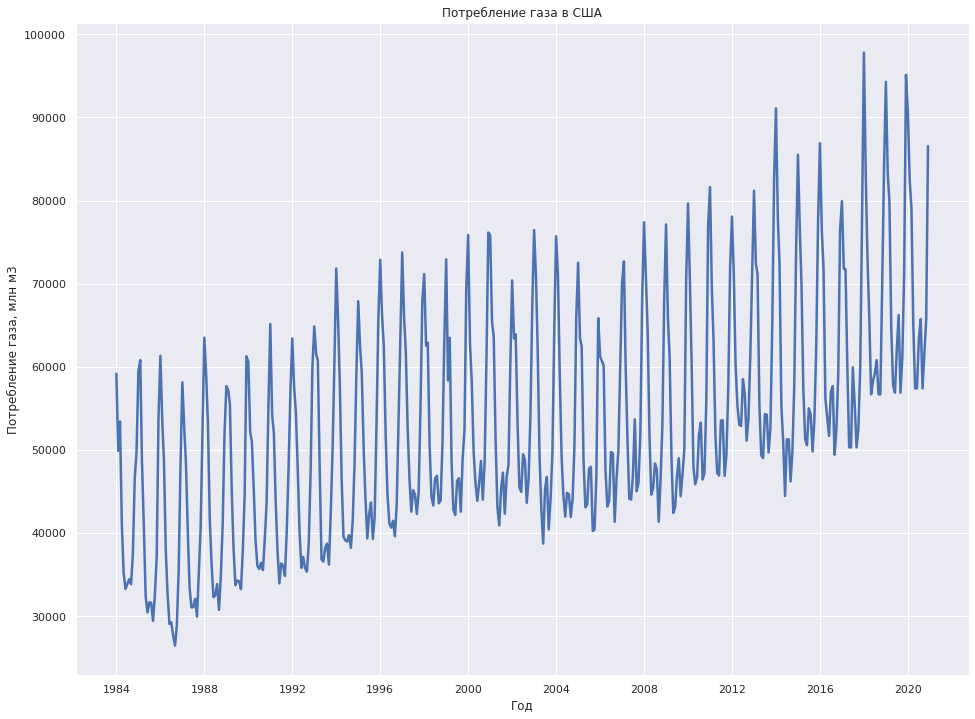

In [4]:
ax = sns.lineplot(data=df['USA'], palette='tab10', linewidth=2.5)
ax.set(xlabel='Год', ylabel='Потребление газа, млн м3', title='Потребление газа в США')
plt.show()

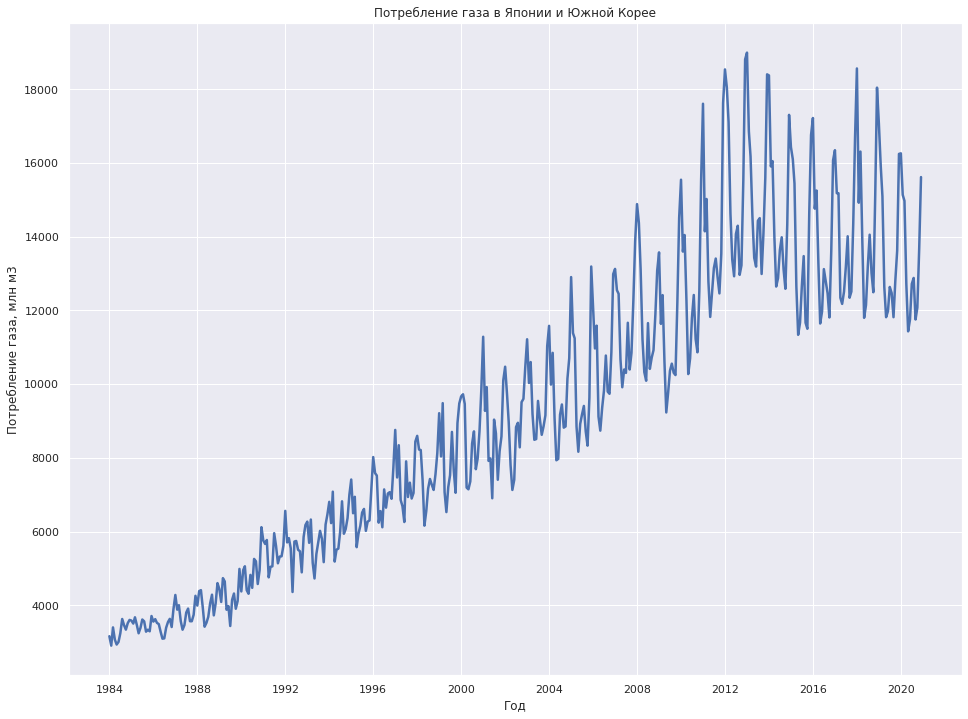

In [5]:
ax = sns.lineplot(data=df['Japan,South Korea'], palette='tab10', linewidth=2.5)
ax.set(xlabel='Год', ylabel='Потребление газа, млн м3', title='Потребление газа в Японии и Южной Корее')
plt.show()

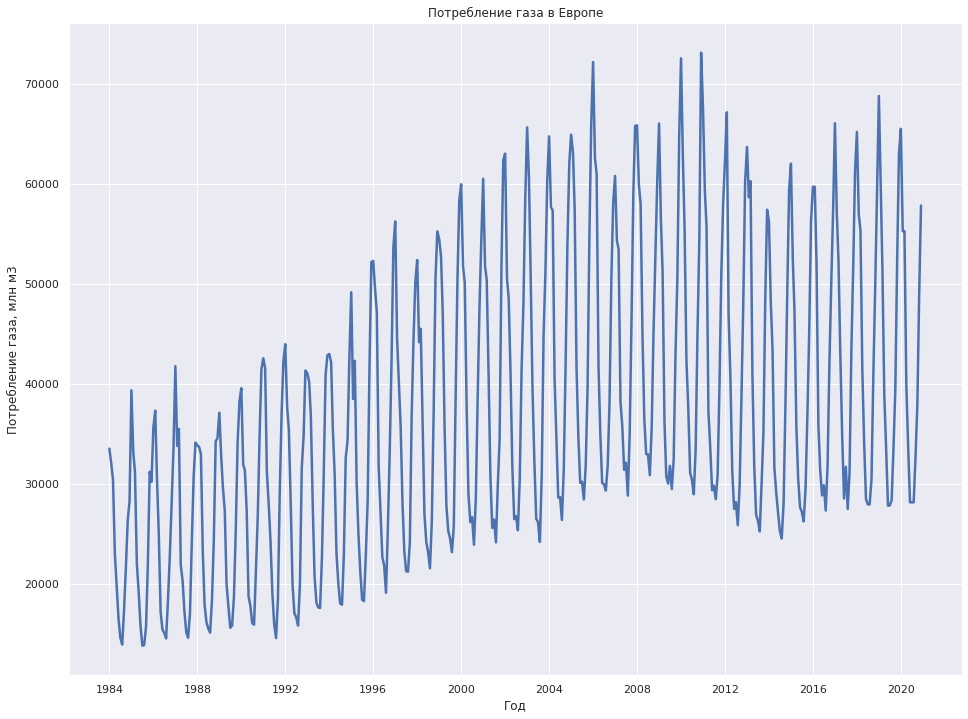

In [6]:
ax = sns.lineplot(data=df['Eupora'], palette='tab10', linewidth=2.5)
ax.set(xlabel='Год', ylabel='Потребление газа, млн м3', title='Потребление газа в Европе')
plt.show()

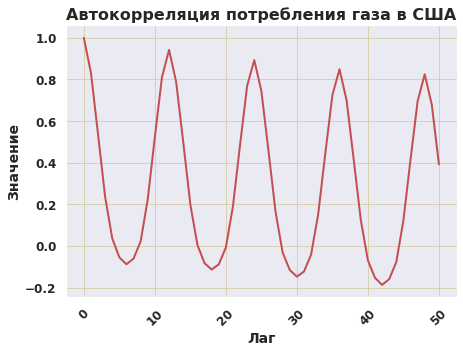

In [7]:
acf_djia, confint_djia, qstat_djia, pvalues_djia = stattools.acf(df['USA'],
                                                             adjusted=True,
                                                             nlags=50,
                                                             qstat=True,
                                                             fft=True,
                                                             alpha=0.05)

plt.figure(figsize=(7, 5))
plt.plot(pd.Series(acf_djia), color='r', linewidth=2)
plt.title('Автокорреляция потребления газа в США', weight='bold', fontsize=16)
plt.xlabel('Лаг', weight='bold', fontsize=14)
plt.ylabel('Значение', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.grid(color = 'y', linewidth = 0.5)


In [8]:
# timestamp_s = df.index.map(pd.Timestamp.timestamp)


In [9]:
# months = 

In [10]:
# day = 24*60*60
# month = 
# year = (365.2425)*day
# df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
# df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
# df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
# df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))


# Модели

In [11]:
split_index = int(df.shape[0] * 0.8)

series = df['USA'].values
train_data = df['USA'][:split_index].values
test_data = df['USA'][split_index:].values

time_train = df['USA'][:split_index].index
time_test = df.index.values[split_index:]
x_valid = df['USA'][split_index:].values

In [12]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [13]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [14]:
window_size = 12
batch_size = 8
shuffle_buffer_size = 1000

dataset = windowed_dataset(train_data, window_size, batch_size, shuffle_buffer_size)
validation_ds = windowed_dataset(test_data, window_size, batch_size, shuffle_buffer_size)

l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])

model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam())
history = model.fit(dataset,
                    validation_data=validation_ds,
                    epochs=1000, verbose=1)


Epoch 1/1000
43/43 [==============================] - 0s 2ms/step - loss: 1001956608.0000 - val_loss: 840119936.0000
Epoch 2/1000
43/43 [==============================] - 0s 834us/step - loss: 384275264.0000 - val_loss: 479642976.0000
Epoch 3/1000
43/43 [==============================] - 0s 904us/step - loss: 318112640.0000 - val_loss: 450941888.0000
Epoch 4/1000
43/43 [==============================] - 0s 875us/step - loss: 306945056.0000 - val_loss: 435573280.0000
Epoch 5/1000
43/43 [==============================] - 0s 895us/step - loss: 295437152.0000 - val_loss: 422199680.0000
Epoch 6/1000
43/43 [==============================] - 0s 865us/step - loss: 283731360.0000 - val_loss: 406350336.0000
Epoch 7/1000
43/43 [==============================] - 0s 829us/step - loss: 271941184.0000 - val_loss: 390898016.0000
Epoch 8/1000
43/43 [==============================] - 0s 825us/step - loss: 259867984.0000 - val_loss: 375394912.0000
Epoch 9/1000
43/43 [==============================] - 0s 

43/43 [==============================] - 0s 811us/step - loss: 28554574.0000 - val_loss: 52830920.0000
Epoch 71/1000
43/43 [==============================] - 0s 842us/step - loss: 27674964.0000 - val_loss: 51789476.0000
Epoch 72/1000
43/43 [==============================] - 0s 808us/step - loss: 26884308.0000 - val_loss: 49854848.0000
Epoch 73/1000
43/43 [==============================] - 0s 826us/step - loss: 25979866.0000 - val_loss: 48505660.0000
Epoch 74/1000
43/43 [==============================] - 0s 798us/step - loss: 25417960.0000 - val_loss: 47897772.0000
Epoch 75/1000
43/43 [==============================] - 0s 848us/step - loss: 24695982.0000 - val_loss: 46100352.0000
Epoch 76/1000
43/43 [==============================] - 0s 844us/step - loss: 23832126.0000 - val_loss: 44466216.0000
Epoch 77/1000
43/43 [==============================] - 0s 834us/step - loss: 23163330.0000 - val_loss: 43188568.0000
Epoch 78/1000
43/43 [==============================] - 0s 849us/step - loss: 2

Epoch 140/1000
43/43 [==============================] - 0s 850us/step - loss: 11562195.0000 - val_loss: 21166622.0000
Epoch 141/1000
43/43 [==============================] - 0s 872us/step - loss: 11422939.0000 - val_loss: 21058210.0000
Epoch 142/1000
43/43 [==============================] - 0s 802us/step - loss: 11584947.0000 - val_loss: 21524384.0000
Epoch 143/1000
43/43 [==============================] - 0s 812us/step - loss: 11337219.0000 - val_loss: 21193322.0000
Epoch 144/1000
43/43 [==============================] - 0s 815us/step - loss: 11247782.0000 - val_loss: 21107608.0000
Epoch 145/1000
43/43 [==============================] - 0s 829us/step - loss: 11285801.0000 - val_loss: 21618188.0000
Epoch 146/1000
43/43 [==============================] - 0s 819us/step - loss: 11219725.0000 - val_loss: 20717136.0000
Epoch 147/1000
43/43 [==============================] - 0s 800us/step - loss: 11329541.0000 - val_loss: 20766598.0000
Epoch 148/1000
43/43 [==============================] - 

43/43 [==============================] - 0s 912us/step - loss: 10546983.0000 - val_loss: 20751824.0000
Epoch 210/1000
43/43 [==============================] - 0s 860us/step - loss: 11041163.0000 - val_loss: 18900314.0000
Epoch 211/1000
43/43 [==============================] - 0s 818us/step - loss: 10646615.0000 - val_loss: 20926906.0000
Epoch 212/1000
43/43 [==============================] - 0s 801us/step - loss: 10674316.0000 - val_loss: 18796238.0000
Epoch 213/1000
43/43 [==============================] - 0s 832us/step - loss: 10842672.0000 - val_loss: 20099572.0000
Epoch 214/1000
43/43 [==============================] - 0s 841us/step - loss: 10810868.0000 - val_loss: 19755660.0000
Epoch 215/1000
43/43 [==============================] - 0s 829us/step - loss: 10414817.0000 - val_loss: 18694596.0000
Epoch 216/1000
43/43 [==============================] - 0s 806us/step - loss: 10293946.0000 - val_loss: 19753540.0000
Epoch 217/1000
43/43 [==============================] - 0s 827us/step -

43/43 [==============================] - 0s 919us/step - loss: 10155071.0000 - val_loss: 18619968.0000
Epoch 279/1000
43/43 [==============================] - 0s 988us/step - loss: 10121392.0000 - val_loss: 17498772.0000
Epoch 280/1000
43/43 [==============================] - 0s 958us/step - loss: 10157167.0000 - val_loss: 19951336.0000
Epoch 281/1000
43/43 [==============================] - 0s 836us/step - loss: 10102204.0000 - val_loss: 17517878.0000
Epoch 282/1000
43/43 [==============================] - 0s 818us/step - loss: 10129192.0000 - val_loss: 17488540.0000
Epoch 283/1000
43/43 [==============================] - 0s 813us/step - loss: 9978009.0000 - val_loss: 17987458.0000
Epoch 284/1000
43/43 [==============================] - 0s 813us/step - loss: 10164359.0000 - val_loss: 17500396.0000
Epoch 285/1000
43/43 [==============================] - 0s 810us/step - loss: 9961779.0000 - val_loss: 17792220.0000
Epoch 286/1000
43/43 [==============================] - 0s 815us/step - l

Epoch 348/1000
43/43 [==============================] - 0s 877us/step - loss: 9655746.0000 - val_loss: 17110858.0000
Epoch 349/1000
43/43 [==============================] - 0s 883us/step - loss: 9967558.0000 - val_loss: 16679924.0000
Epoch 350/1000
43/43 [==============================] - 0s 822us/step - loss: 9739708.0000 - val_loss: 16710134.0000
Epoch 351/1000
43/43 [==============================] - 0s 909us/step - loss: 9764187.0000 - val_loss: 16648109.0000
Epoch 352/1000
43/43 [==============================] - 0s 845us/step - loss: 9677695.0000 - val_loss: 16699505.0000
Epoch 353/1000
43/43 [==============================] - 0s 860us/step - loss: 9866300.0000 - val_loss: 16628766.0000
Epoch 354/1000
43/43 [==============================] - 0s 878us/step - loss: 9789659.0000 - val_loss: 17436958.0000
Epoch 355/1000
43/43 [==============================] - 0s 835us/step - loss: 9652047.0000 - val_loss: 17209902.0000
Epoch 356/1000
43/43 [==============================] - 0s 901us

Epoch 418/1000
43/43 [==============================] - 0s 845us/step - loss: 9442810.0000 - val_loss: 18266464.0000
Epoch 419/1000
43/43 [==============================] - 0s 868us/step - loss: 9973550.0000 - val_loss: 16598003.0000
Epoch 420/1000
43/43 [==============================] - 0s 858us/step - loss: 9553003.0000 - val_loss: 16393361.0000
Epoch 421/1000
43/43 [==============================] - 0s 861us/step - loss: 9507141.0000 - val_loss: 16201106.0000
Epoch 422/1000
43/43 [==============================] - 0s 887us/step - loss: 9449567.0000 - val_loss: 16121164.0000
Epoch 423/1000
43/43 [==============================] - 0s 858us/step - loss: 9516740.0000 - val_loss: 16285669.0000
Epoch 424/1000
43/43 [==============================] - 0s 852us/step - loss: 9527150.0000 - val_loss: 16223370.0000
Epoch 425/1000
43/43 [==============================] - 0s 833us/step - loss: 9382369.0000 - val_loss: 16093965.0000
Epoch 426/1000
43/43 [==============================] - 0s 866us

43/43 [==============================] - 0s 847us/step - loss: 10169148.0000 - val_loss: 16699086.0000
Epoch 489/1000
43/43 [==============================] - 0s 820us/step - loss: 9819626.0000 - val_loss: 15782380.0000
Epoch 490/1000
43/43 [==============================] - 0s 818us/step - loss: 9461627.0000 - val_loss: 15715057.0000
Epoch 491/1000
43/43 [==============================] - 0s 882us/step - loss: 9430290.0000 - val_loss: 15712401.0000
Epoch 492/1000
43/43 [==============================] - 0s 822us/step - loss: 9415905.0000 - val_loss: 16906916.0000
Epoch 493/1000
43/43 [==============================] - 0s 832us/step - loss: 9616232.0000 - val_loss: 15734505.0000
Epoch 494/1000
43/43 [==============================] - 0s 816us/step - loss: 9274639.0000 - val_loss: 15728731.0000
Epoch 495/1000
43/43 [==============================] - 0s 843us/step - loss: 9355370.0000 - val_loss: 15773553.0000
Epoch 496/1000
43/43 [==============================] - 0s 827us/step - loss: 

43/43 [==============================] - 0s 814us/step - loss: 9342470.0000 - val_loss: 18886710.0000
Epoch 559/1000
43/43 [==============================] - 0s 815us/step - loss: 9592822.0000 - val_loss: 15907724.0000
Epoch 560/1000
43/43 [==============================] - 0s 807us/step - loss: 9177751.0000 - val_loss: 15712899.0000
Epoch 561/1000
43/43 [==============================] - 0s 834us/step - loss: 9484522.0000 - val_loss: 15978012.0000
Epoch 562/1000
43/43 [==============================] - 0s 801us/step - loss: 9657499.0000 - val_loss: 15740226.0000
Epoch 563/1000
43/43 [==============================] - 0s 826us/step - loss: 9299245.0000 - val_loss: 15742777.0000
Epoch 564/1000
43/43 [==============================] - 0s 805us/step - loss: 9346603.0000 - val_loss: 15583872.0000
Epoch 565/1000
43/43 [==============================] - 0s 821us/step - loss: 9464339.0000 - val_loss: 15578988.0000
Epoch 566/1000
43/43 [==============================] - 0s 837us/step - loss: 9

43/43 [==============================] - 0s 802us/step - loss: 9208104.0000 - val_loss: 15675053.0000
Epoch 629/1000
43/43 [==============================] - 0s 846us/step - loss: 9639219.0000 - val_loss: 16143370.0000
Epoch 630/1000
43/43 [==============================] - 0s 821us/step - loss: 9294014.0000 - val_loss: 15436288.0000
Epoch 631/1000
43/43 [==============================] - 0s 812us/step - loss: 9314386.0000 - val_loss: 15442425.0000
Epoch 632/1000
43/43 [==============================] - 0s 828us/step - loss: 9219937.0000 - val_loss: 15522053.0000
Epoch 633/1000
43/43 [==============================] - 0s 845us/step - loss: 9300731.0000 - val_loss: 15363408.0000
Epoch 634/1000
43/43 [==============================] - 0s 804us/step - loss: 9486038.0000 - val_loss: 15352130.0000
Epoch 635/1000
43/43 [==============================] - 0s 841us/step - loss: 9551740.0000 - val_loss: 15339595.0000
Epoch 636/1000
43/43 [==============================] - 0s 828us/step - loss: 9

43/43 [==============================] - 0s 861us/step - loss: 9413754.0000 - val_loss: 15397275.0000
Epoch 699/1000
43/43 [==============================] - 0s 838us/step - loss: 9073009.0000 - val_loss: 15334506.0000
Epoch 700/1000
43/43 [==============================] - 0s 825us/step - loss: 9514239.0000 - val_loss: 17272666.0000
Epoch 701/1000
43/43 [==============================] - 0s 832us/step - loss: 9348662.0000 - val_loss: 15953179.0000
Epoch 702/1000
43/43 [==============================] - 0s 878us/step - loss: 9148256.0000 - val_loss: 15378773.0000
Epoch 703/1000
43/43 [==============================] - 0s 818us/step - loss: 9164148.0000 - val_loss: 15395102.0000
Epoch 704/1000
43/43 [==============================] - 0s 808us/step - loss: 9632084.0000 - val_loss: 15245565.0000
Epoch 705/1000
43/43 [==============================] - 0s 827us/step - loss: 9670449.0000 - val_loss: 16300148.0000
Epoch 706/1000
43/43 [==============================] - 0s 833us/step - loss: 9

43/43 [==============================] - 0s 836us/step - loss: 9217559.0000 - val_loss: 15331468.0000
Epoch 769/1000
43/43 [==============================] - 0s 875us/step - loss: 9116211.0000 - val_loss: 16619450.0000
Epoch 770/1000
43/43 [==============================] - 0s 861us/step - loss: 9303530.0000 - val_loss: 16082337.0000
Epoch 771/1000
43/43 [==============================] - 0s 876us/step - loss: 9325924.0000 - val_loss: 17236544.0000
Epoch 772/1000
43/43 [==============================] - 0s 925us/step - loss: 9347965.0000 - val_loss: 16424651.0000
Epoch 773/1000
43/43 [==============================] - 0s 938us/step - loss: 9786062.0000 - val_loss: 17198990.0000
Epoch 774/1000
43/43 [==============================] - 0s 893us/step - loss: 9561133.0000 - val_loss: 15213350.0000
Epoch 775/1000
43/43 [==============================] - 0s 881us/step - loss: 9316650.0000 - val_loss: 15291420.0000
Epoch 776/1000
43/43 [==============================] - 0s 852us/step - loss: 9

43/43 [==============================] - 0s 821us/step - loss: 8968477.0000 - val_loss: 17289260.0000
Epoch 839/1000
43/43 [==============================] - 0s 817us/step - loss: 9213586.0000 - val_loss: 15111968.0000
Epoch 840/1000
43/43 [==============================] - 0s 869us/step - loss: 9088724.0000 - val_loss: 16435233.0000
Epoch 841/1000
43/43 [==============================] - 0s 811us/step - loss: 9108226.0000 - val_loss: 15830829.0000
Epoch 842/1000
43/43 [==============================] - 0s 804us/step - loss: 9187065.0000 - val_loss: 16103268.0000
Epoch 843/1000
43/43 [==============================] - 0s 806us/step - loss: 9081080.0000 - val_loss: 15515404.0000
Epoch 844/1000
43/43 [==============================] - 0s 820us/step - loss: 9822378.0000 - val_loss: 15067540.0000
Epoch 845/1000
43/43 [==============================] - 0s 826us/step - loss: 9385173.0000 - val_loss: 15078618.0000
Epoch 846/1000
43/43 [==============================] - 0s 811us/step - loss: 9

43/43 [==============================] - 0s 860us/step - loss: 9162383.0000 - val_loss: 15480132.0000
Epoch 909/1000
43/43 [==============================] - 0s 808us/step - loss: 9312501.0000 - val_loss: 15272854.0000
Epoch 910/1000
43/43 [==============================] - 0s 811us/step - loss: 10005411.0000 - val_loss: 17211382.0000
Epoch 911/1000
43/43 [==============================] - 0s 850us/step - loss: 9000487.0000 - val_loss: 15404509.0000
Epoch 912/1000
43/43 [==============================] - 0s 835us/step - loss: 9132727.0000 - val_loss: 15439412.0000
Epoch 913/1000
43/43 [==============================] - 0s 810us/step - loss: 9072374.0000 - val_loss: 15129991.0000
Epoch 914/1000
43/43 [==============================] - 0s 823us/step - loss: 9027644.0000 - val_loss: 15020195.0000
Epoch 915/1000
43/43 [==============================] - 0s 826us/step - loss: 8984345.0000 - val_loss: 15434306.0000
Epoch 916/1000
43/43 [==============================] - 0s 815us/step - loss: 

43/43 [==============================] - 0s 811us/step - loss: 8962120.0000 - val_loss: 15741796.0000
Epoch 979/1000
43/43 [==============================] - 0s 885us/step - loss: 9311080.0000 - val_loss: 15093072.0000
Epoch 980/1000
43/43 [==============================] - 0s 811us/step - loss: 9006530.0000 - val_loss: 15035096.0000
Epoch 981/1000
43/43 [==============================] - 0s 837us/step - loss: 9240776.0000 - val_loss: 15770109.0000
Epoch 982/1000
43/43 [==============================] - 0s 848us/step - loss: 9014154.0000 - val_loss: 15241454.0000
Epoch 983/1000
43/43 [==============================] - 0s 893us/step - loss: 9447599.0000 - val_loss: 17443032.0000
Epoch 984/1000
43/43 [==============================] - 0s 877us/step - loss: 9258066.0000 - val_loss: 15619898.0000
Epoch 985/1000
43/43 [==============================] - 0s 895us/step - loss: 9723867.0000 - val_loss: 15204016.0000
Epoch 986/1000
43/43 [==============================] - 0s 908us/step - loss: 9

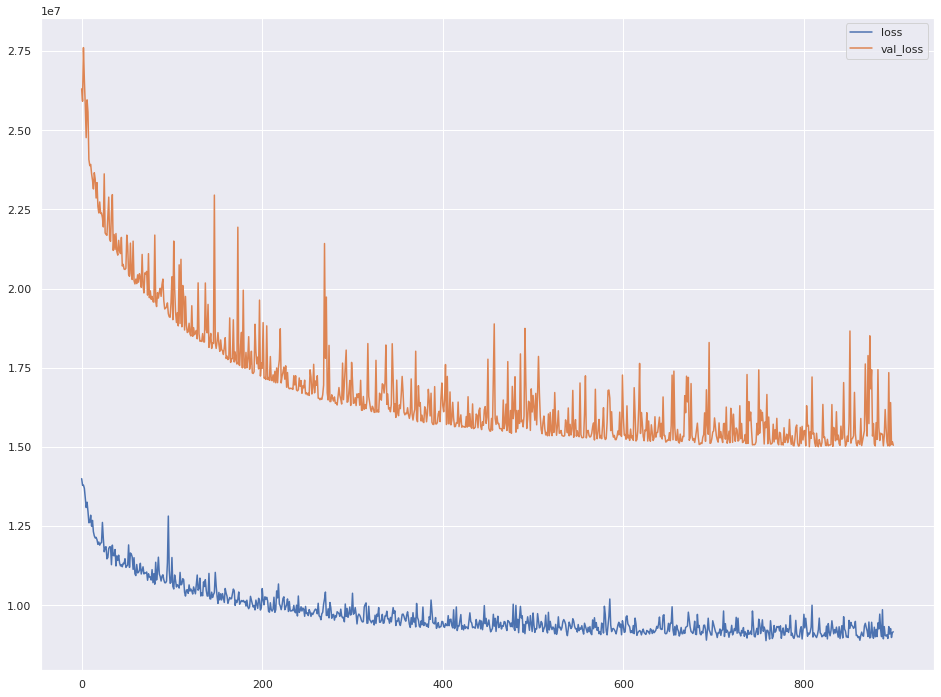

In [15]:
def plot_history(history, metrics=['loss', 'val_loss'], offset=0):
    for metric in metrics:
        plt.plot(history.history[metric][offset:], label=metric)
    plt.legend()
    plt.show()
    
plot_history(history, offset=100)

In [26]:
def forecast(model, plot=True):
    forecast = []

    for time in range(len(series) - window_size):
        forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

    forecast = forecast[split_index-window_size:]
    results = np.array(forecast)[:, 0, 0]

    if plot:
        plt.plot(time_train, train_data, 'g', label='Фактические данные')
        plt.plot(time_test, test_data, marker='.', label='Прогнозируемые реальные данные')
        plt.plot(time_test, results, 'r', label='Прогноз')
        plt.ylabel('Объем потребления газа')
        plt.xlabel('Время')
        plt.legend()
        plt.show(); 
        
        # Scale predictions
        plt.plot(time_test, test_data, marker='.', label="true")
        plt.plot(time_test, results, 'r', label="prediction")
        plt.ylabel('Value')
        plt.xlabel('Time Step')
        plt.legend()
        plt.show();        
    return results

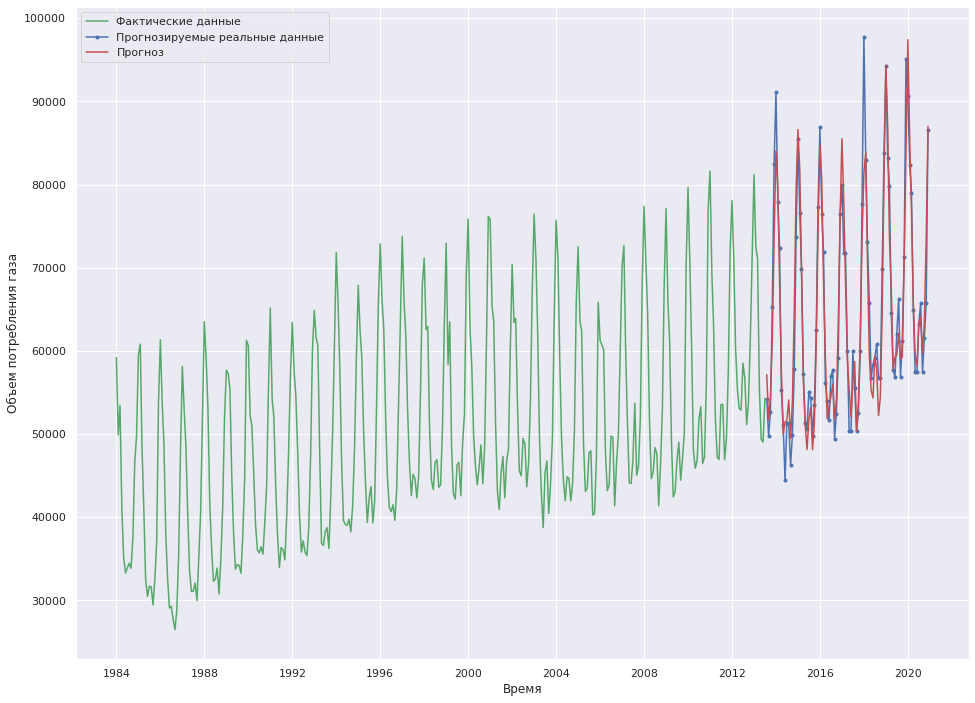

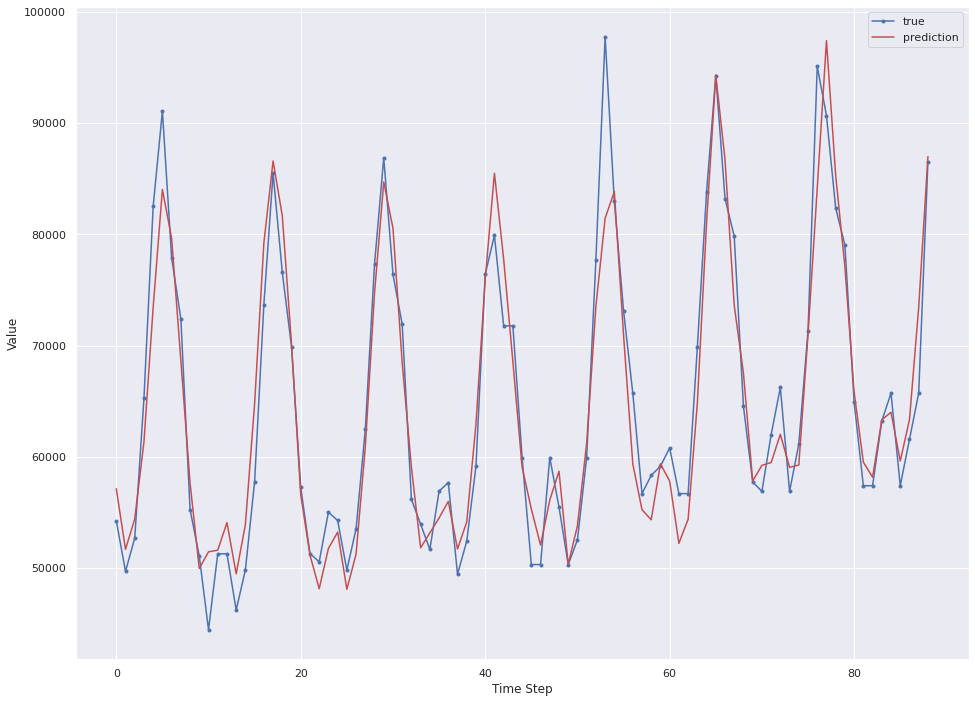

In [17]:
results = forecast(model)

In [18]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

3011.7734

In [44]:
model = tf.keras.models.Sequential([
    layers.Dense(32, input_shape=[window_size], activation='relu'), 
#     layers.Dropout(0.5),
    layers.Dense(32, activation='relu'), 
#     layers.Dropout(0.5),    
#     layers.Dense(32, activation='relu'), 
#     layers.Dropout(0.5),
    layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam())
history = model.fit(dataset, 
                    validation_data=validation_ds,
                    epochs=2500, verbose=1)

Epoch 1/2500
43/43 [==============================] - 0s 2ms/step - loss: 314006976.0000 - val_loss: 125977560.0000
Epoch 2/2500
43/43 [==============================] - 0s 1ms/step - loss: 68375824.0000 - val_loss: 70767184.0000
Epoch 3/2500
43/43 [==============================] - 0s 999us/step - loss: 40087056.0000 - val_loss: 45094496.0000
Epoch 4/2500
43/43 [==============================] - 0s 1ms/step - loss: 24049744.0000 - val_loss: 42501732.0000
Epoch 5/2500
43/43 [==============================] - 0s 1ms/step - loss: 18454372.0000 - val_loss: 23629078.0000
Epoch 6/2500
43/43 [==============================] - 0s 1ms/step - loss: 14678197.0000 - val_loss: 20664252.0000
Epoch 7/2500
43/43 [==============================] - 0s 1ms/step - loss: 12205166.0000 - val_loss: 21040090.0000
Epoch 8/2500
43/43 [==============================] - 0s 1ms/step - loss: 11197263.0000 - val_loss: 17248622.0000
Epoch 9/2500
43/43 [==============================] - 0s 1ms/step - loss: 10779585.0

43/43 [==============================] - 0s 1ms/step - loss: 7887767.0000 - val_loss: 14130568.0000
Epoch 73/2500
43/43 [==============================] - 0s 987us/step - loss: 7910375.5000 - val_loss: 16503035.0000
Epoch 74/2500
43/43 [==============================] - 0s 980us/step - loss: 10138317.0000 - val_loss: 12247377.0000
Epoch 75/2500
43/43 [==============================] - 0s 985us/step - loss: 8542856.0000 - val_loss: 11111454.0000
Epoch 76/2500
43/43 [==============================] - 0s 991us/step - loss: 8251163.5000 - val_loss: 14687909.0000
Epoch 77/2500
43/43 [==============================] - 0s 1ms/step - loss: 8905165.0000 - val_loss: 11949089.0000
Epoch 78/2500
43/43 [==============================] - 0s 1ms/step - loss: 8324124.5000 - val_loss: 16453948.0000
Epoch 79/2500
43/43 [==============================] - 0s 991us/step - loss: 7986512.5000 - val_loss: 12265534.0000
Epoch 80/2500
43/43 [==============================] - 0s 1ms/step - loss: 8254056.5000 - v

43/43 [==============================] - 0s 1ms/step - loss: 6590859.5000 - val_loss: 10619793.0000
Epoch 144/2500
43/43 [==============================] - 0s 977us/step - loss: 7009186.0000 - val_loss: 12354638.0000
Epoch 145/2500
43/43 [==============================] - 0s 1ms/step - loss: 8246367.5000 - val_loss: 13149636.0000
Epoch 146/2500
43/43 [==============================] - 0s 1ms/step - loss: 8838638.0000 - val_loss: 11376827.0000
Epoch 147/2500
43/43 [==============================] - 0s 987us/step - loss: 7094018.0000 - val_loss: 10318732.0000
Epoch 148/2500
43/43 [==============================] - 0s 1ms/step - loss: 7156439.0000 - val_loss: 12301231.0000
Epoch 149/2500
43/43 [==============================] - 0s 1ms/step - loss: 6533236.5000 - val_loss: 10270408.0000
Epoch 150/2500
43/43 [==============================] - 0s 1ms/step - loss: 6570604.0000 - val_loss: 9979505.0000
Epoch 151/2500
43/43 [==============================] - 0s 1ms/step - loss: 6943777.0000 - v

43/43 [==============================] - 0s 1ms/step - loss: 6503939.5000 - val_loss: 11503102.0000
Epoch 215/2500
43/43 [==============================] - 0s 1ms/step - loss: 6067174.5000 - val_loss: 11812000.0000
Epoch 216/2500
43/43 [==============================] - 0s 1ms/step - loss: 6288349.0000 - val_loss: 12557342.0000
Epoch 217/2500
43/43 [==============================] - 0s 1ms/step - loss: 6548776.5000 - val_loss: 10025954.0000
Epoch 218/2500
43/43 [==============================] - 0s 1ms/step - loss: 6096371.5000 - val_loss: 11995568.0000
Epoch 219/2500
43/43 [==============================] - 0s 1ms/step - loss: 6140061.0000 - val_loss: 9826220.0000
Epoch 220/2500
43/43 [==============================] - 0s 1ms/step - loss: 6328491.0000 - val_loss: 10327160.0000
Epoch 221/2500
43/43 [==============================] - 0s 1ms/step - loss: 5857350.0000 - val_loss: 10108387.0000
Epoch 222/2500
43/43 [==============================] - 0s 1ms/step - loss: 6230944.5000 - val_l

43/43 [==============================] - 0s 1ms/step - loss: 5699011.0000 - val_loss: 10890110.0000
Epoch 286/2500
43/43 [==============================] - 0s 1ms/step - loss: 6577682.0000 - val_loss: 17970170.0000
Epoch 287/2500
43/43 [==============================] - 0s 1ms/step - loss: 6921186.0000 - val_loss: 9155300.0000
Epoch 288/2500
43/43 [==============================] - 0s 1ms/step - loss: 6272250.0000 - val_loss: 12282572.0000
Epoch 289/2500
43/43 [==============================] - 0s 1ms/step - loss: 5889548.5000 - val_loss: 9246084.0000
Epoch 290/2500
43/43 [==============================] - 0s 1ms/step - loss: 5727075.5000 - val_loss: 9517005.0000
Epoch 291/2500
43/43 [==============================] - 0s 1ms/step - loss: 6310921.0000 - val_loss: 10336260.0000
Epoch 292/2500
43/43 [==============================] - 0s 1ms/step - loss: 5911763.0000 - val_loss: 9357666.0000
Epoch 293/2500
43/43 [==============================] - 0s 1ms/step - loss: 6332083.0000 - val_loss

43/43 [==============================] - 0s 985us/step - loss: 5403485.5000 - val_loss: 16991402.0000
Epoch 357/2500
43/43 [==============================] - 0s 1ms/step - loss: 6713472.5000 - val_loss: 8986754.0000
Epoch 358/2500
43/43 [==============================] - 0s 1ms/step - loss: 6894999.5000 - val_loss: 9738823.0000
Epoch 359/2500
43/43 [==============================] - 0s 984us/step - loss: 5564371.0000 - val_loss: 12003952.0000
Epoch 360/2500
43/43 [==============================] - 0s 987us/step - loss: 5787783.5000 - val_loss: 8633108.0000
Epoch 361/2500
43/43 [==============================] - 0s 982us/step - loss: 5446210.5000 - val_loss: 9797577.0000
Epoch 362/2500
43/43 [==============================] - 0s 1ms/step - loss: 5398837.0000 - val_loss: 19014648.0000
Epoch 363/2500
43/43 [==============================] - 0s 986us/step - loss: 5873862.5000 - val_loss: 10495473.0000
Epoch 364/2500
43/43 [==============================] - 0s 969us/step - loss: 6111887.000

43/43 [==============================] - 0s 1ms/step - loss: 5453705.5000 - val_loss: 9520574.0000
Epoch 428/2500
43/43 [==============================] - 0s 1ms/step - loss: 5050770.5000 - val_loss: 11630015.0000
Epoch 429/2500
43/43 [==============================] - 0s 1ms/step - loss: 6572977.5000 - val_loss: 9713546.0000
Epoch 430/2500
43/43 [==============================] - 0s 1ms/step - loss: 6994491.5000 - val_loss: 8775019.0000
Epoch 431/2500
43/43 [==============================] - 0s 1ms/step - loss: 5469009.5000 - val_loss: 9983630.0000
Epoch 432/2500
43/43 [==============================] - 0s 1ms/step - loss: 5360199.5000 - val_loss: 10489297.0000
Epoch 433/2500
43/43 [==============================] - 0s 1ms/step - loss: 5114648.5000 - val_loss: 9507722.0000
Epoch 434/2500
43/43 [==============================] - 0s 1ms/step - loss: 5127444.5000 - val_loss: 9705517.0000
Epoch 435/2500
43/43 [==============================] - 0s 1ms/step - loss: 5032938.0000 - val_loss: 

43/43 [==============================] - 0s 1ms/step - loss: 4837503.0000 - val_loss: 11600479.0000
Epoch 499/2500
43/43 [==============================] - 0s 1ms/step - loss: 7188680.0000 - val_loss: 22365352.0000
Epoch 500/2500
43/43 [==============================] - 0s 1ms/step - loss: 5330102.5000 - val_loss: 10122179.0000
Epoch 501/2500
43/43 [==============================] - 0s 1ms/step - loss: 4534572.5000 - val_loss: 10427773.0000
Epoch 502/2500
43/43 [==============================] - 0s 1ms/step - loss: 5489303.5000 - val_loss: 8983608.0000
Epoch 503/2500
43/43 [==============================] - 0s 1ms/step - loss: 4965695.0000 - val_loss: 9325203.0000
Epoch 504/2500
43/43 [==============================] - 0s 1ms/step - loss: 5214541.0000 - val_loss: 9959359.0000
Epoch 505/2500
43/43 [==============================] - 0s 1ms/step - loss: 5071522.0000 - val_loss: 9333753.0000
Epoch 506/2500
43/43 [==============================] - 0s 1ms/step - loss: 4797855.5000 - val_loss

43/43 [==============================] - 0s 1ms/step - loss: 6049435.0000 - val_loss: 11189928.0000
Epoch 570/2500
43/43 [==============================] - 0s 1ms/step - loss: 4718650.5000 - val_loss: 10706155.0000
Epoch 571/2500
43/43 [==============================] - 0s 1ms/step - loss: 5883620.0000 - val_loss: 8920295.0000
Epoch 572/2500
43/43 [==============================] - 0s 2ms/step - loss: 4895245.5000 - val_loss: 13000472.0000
Epoch 573/2500
43/43 [==============================] - 0s 989us/step - loss: 5189530.0000 - val_loss: 8644003.0000
Epoch 574/2500
43/43 [==============================] - 0s 1ms/step - loss: 5022645.5000 - val_loss: 8476644.0000
Epoch 575/2500
43/43 [==============================] - 0s 1ms/step - loss: 5103427.0000 - val_loss: 9493029.0000
Epoch 576/2500
43/43 [==============================] - 0s 1ms/step - loss: 4881845.0000 - val_loss: 9093249.0000
Epoch 577/2500
43/43 [==============================] - 0s 989us/step - loss: 4514867.5000 - val_l

43/43 [==============================] - 0s 991us/step - loss: 4841206.5000 - val_loss: 9117658.0000
Epoch 641/2500
43/43 [==============================] - 0s 1ms/step - loss: 4732163.5000 - val_loss: 8816451.0000
Epoch 642/2500
43/43 [==============================] - 0s 1ms/step - loss: 4301564.5000 - val_loss: 10318112.0000
Epoch 643/2500
43/43 [==============================] - 0s 1ms/step - loss: 4669988.0000 - val_loss: 9367870.0000
Epoch 644/2500
43/43 [==============================] - 0s 1ms/step - loss: 4459392.0000 - val_loss: 10064307.0000
Epoch 645/2500
43/43 [==============================] - 0s 1ms/step - loss: 4599960.0000 - val_loss: 9616234.0000
Epoch 646/2500
43/43 [==============================] - 0s 987us/step - loss: 4568602.5000 - val_loss: 10632918.0000
Epoch 647/2500
43/43 [==============================] - 0s 1ms/step - loss: 4194310.5000 - val_loss: 9306005.0000
Epoch 648/2500
43/43 [==============================] - 0s 1ms/step - loss: 4698190.5000 - val_l

43/43 [==============================] - 0s 1ms/step - loss: 4690434.0000 - val_loss: 9480044.0000
Epoch 712/2500
43/43 [==============================] - 0s 1ms/step - loss: 4708995.5000 - val_loss: 10449628.0000
Epoch 713/2500
43/43 [==============================] - 0s 1ms/step - loss: 4699132.0000 - val_loss: 16730740.0000
Epoch 714/2500
43/43 [==============================] - 0s 1ms/step - loss: 4743140.0000 - val_loss: 12601687.0000
Epoch 715/2500
43/43 [==============================] - 0s 1ms/step - loss: 5001970.0000 - val_loss: 9380030.0000
Epoch 716/2500
43/43 [==============================] - 0s 1ms/step - loss: 4455604.0000 - val_loss: 8863689.0000
Epoch 717/2500
43/43 [==============================] - 0s 1ms/step - loss: 4520231.0000 - val_loss: 8322477.5000
Epoch 718/2500
43/43 [==============================] - 0s 1ms/step - loss: 4049066.5000 - val_loss: 10369296.0000
Epoch 719/2500
43/43 [==============================] - 0s 1ms/step - loss: 4760105.0000 - val_loss

43/43 [==============================] - 0s 1ms/step - loss: 4404679.5000 - val_loss: 10890457.0000
Epoch 783/2500
43/43 [==============================] - 0s 1ms/step - loss: 4502530.0000 - val_loss: 11983729.0000
Epoch 784/2500
43/43 [==============================] - 0s 1ms/step - loss: 4124685.0000 - val_loss: 11000618.0000
Epoch 785/2500
43/43 [==============================] - 0s 1ms/step - loss: 4506082.0000 - val_loss: 10402177.0000
Epoch 786/2500
43/43 [==============================] - 0s 2ms/step - loss: 4645462.0000 - val_loss: 9255178.0000
Epoch 787/2500
43/43 [==============================] - 0s 2ms/step - loss: 4696502.5000 - val_loss: 9492724.0000
Epoch 788/2500
43/43 [==============================] - 0s 1ms/step - loss: 4233483.5000 - val_loss: 10889357.0000
Epoch 789/2500
43/43 [==============================] - 0s 1ms/step - loss: 4219125.5000 - val_loss: 10110206.0000
Epoch 790/2500
43/43 [==============================] - 0s 1ms/step - loss: 4455530.5000 - val_lo

43/43 [==============================] - 0s 1ms/step - loss: 3763120.2500 - val_loss: 10165314.0000
Epoch 854/2500
43/43 [==============================] - 0s 986us/step - loss: 3896292.5000 - val_loss: 9251849.0000
Epoch 855/2500
43/43 [==============================] - 0s 1ms/step - loss: 3905505.5000 - val_loss: 9644218.0000
Epoch 856/2500
43/43 [==============================] - 0s 1ms/step - loss: 4147513.0000 - val_loss: 11316009.0000
Epoch 857/2500
43/43 [==============================] - 0s 965us/step - loss: 4643381.0000 - val_loss: 14068969.0000
Epoch 858/2500
43/43 [==============================] - 0s 1ms/step - loss: 4312062.0000 - val_loss: 8721930.0000
Epoch 859/2500
43/43 [==============================] - 0s 1ms/step - loss: 4002707.0000 - val_loss: 8952790.0000
Epoch 860/2500
43/43 [==============================] - 0s 993us/step - loss: 4020074.2500 - val_loss: 8223018.5000
Epoch 861/2500
43/43 [==============================] - 0s 978us/step - loss: 3986261.5000 - v

43/43 [==============================] - 0s 1ms/step - loss: 3861051.7500 - val_loss: 11464046.0000
Epoch 925/2500
43/43 [==============================] - 0s 1ms/step - loss: 3677839.7500 - val_loss: 8795831.0000
Epoch 926/2500
43/43 [==============================] - 0s 1ms/step - loss: 4295252.0000 - val_loss: 8748980.0000
Epoch 927/2500
43/43 [==============================] - 0s 998us/step - loss: 4796252.5000 - val_loss: 9450161.0000
Epoch 928/2500
43/43 [==============================] - 0s 1ms/step - loss: 4072925.0000 - val_loss: 10551756.0000
Epoch 929/2500
43/43 [==============================] - 0s 1ms/step - loss: 4985205.0000 - val_loss: 11546364.0000
Epoch 930/2500
43/43 [==============================] - 0s 1ms/step - loss: 4645657.5000 - val_loss: 11268796.0000
Epoch 931/2500
43/43 [==============================] - 0s 1ms/step - loss: 4910836.0000 - val_loss: 10823660.0000
Epoch 932/2500
43/43 [==============================] - 0s 1ms/step - loss: 3741715.0000 - val_l

43/43 [==============================] - 0s 1ms/step - loss: 3422043.7500 - val_loss: 12650007.0000
Epoch 996/2500
43/43 [==============================] - 0s 992us/step - loss: 4184976.0000 - val_loss: 8613664.0000
Epoch 997/2500
43/43 [==============================] - 0s 996us/step - loss: 3417120.5000 - val_loss: 8987882.0000
Epoch 998/2500
43/43 [==============================] - 0s 989us/step - loss: 3222495.5000 - val_loss: 8845091.0000
Epoch 999/2500
43/43 [==============================] - 0s 980us/step - loss: 3644531.2500 - val_loss: 9240539.0000
Epoch 1000/2500
43/43 [==============================] - 0s 1ms/step - loss: 3616233.2500 - val_loss: 9833669.0000
Epoch 1001/2500
43/43 [==============================] - 0s 996us/step - loss: 3733782.0000 - val_loss: 10122612.0000
Epoch 1002/2500
43/43 [==============================] - 0s 983us/step - loss: 3788009.5000 - val_loss: 9097846.0000
Epoch 1003/2500
43/43 [==============================] - 0s 1ms/step - loss: 3803329.0

43/43 [==============================] - 0s 979us/step - loss: 3514156.7500 - val_loss: 9852732.0000
Epoch 1066/2500
43/43 [==============================] - 0s 2ms/step - loss: 3408181.7500 - val_loss: 8442208.0000
Epoch 1067/2500
43/43 [==============================] - 0s 1ms/step - loss: 3710733.7500 - val_loss: 8765209.0000
Epoch 1068/2500
43/43 [==============================] - 0s 990us/step - loss: 4114870.5000 - val_loss: 8378222.5000
Epoch 1069/2500
43/43 [==============================] - 0s 987us/step - loss: 3421009.2500 - val_loss: 11323198.0000
Epoch 1070/2500
43/43 [==============================] - 0s 1ms/step - loss: 3550855.0000 - val_loss: 9452446.0000
Epoch 1071/2500
43/43 [==============================] - 0s 1ms/step - loss: 3355611.0000 - val_loss: 8629811.0000
Epoch 1072/2500
43/43 [==============================] - 0s 1ms/step - loss: 3474410.2500 - val_loss: 9761190.0000
Epoch 1073/2500
43/43 [==============================] - 0s 982us/step - loss: 3625155.25

43/43 [==============================] - 0s 1ms/step - loss: 4000314.5000 - val_loss: 8420056.0000
Epoch 1136/2500
43/43 [==============================] - 0s 1000us/step - loss: 3493066.2500 - val_loss: 9384682.0000
Epoch 1137/2500
43/43 [==============================] - 0s 1ms/step - loss: 3022829.7500 - val_loss: 10009813.0000
Epoch 1138/2500
43/43 [==============================] - 0s 986us/step - loss: 3726080.7500 - val_loss: 9183557.0000
Epoch 1139/2500
43/43 [==============================] - 0s 1ms/step - loss: 3777311.0000 - val_loss: 13860737.0000
Epoch 1140/2500
43/43 [==============================] - 0s 1ms/step - loss: 4070989.5000 - val_loss: 12614537.0000
Epoch 1141/2500
43/43 [==============================] - 0s 1ms/step - loss: 3583065.2500 - val_loss: 10355846.0000
Epoch 1142/2500
43/43 [==============================] - 0s 1ms/step - loss: 3484500.7500 - val_loss: 8896371.0000
Epoch 1143/2500
43/43 [==============================] - 0s 1ms/step - loss: 3725614.00

43/43 [==============================] - 0s 997us/step - loss: 4083613.7500 - val_loss: 10446406.0000
Epoch 1206/2500
43/43 [==============================] - 0s 997us/step - loss: 3587256.7500 - val_loss: 9520573.0000
Epoch 1207/2500
43/43 [==============================] - 0s 986us/step - loss: 3686419.5000 - val_loss: 10045078.0000
Epoch 1208/2500
43/43 [==============================] - 0s 1ms/step - loss: 3580982.7500 - val_loss: 11472318.0000
Epoch 1209/2500
43/43 [==============================] - 0s 1ms/step - loss: 4111038.2500 - val_loss: 8774012.0000
Epoch 1210/2500
43/43 [==============================] - 0s 983us/step - loss: 3554460.7500 - val_loss: 10173988.0000
Epoch 1211/2500
43/43 [==============================] - 0s 996us/step - loss: 3317891.7500 - val_loss: 8938968.0000
Epoch 1212/2500
43/43 [==============================] - 0s 994us/step - loss: 3462788.5000 - val_loss: 8843092.0000
Epoch 1213/2500
43/43 [==============================] - 0s 1ms/step - loss: 301

43/43 [==============================] - 0s 998us/step - loss: 3229214.2500 - val_loss: 8878958.0000
Epoch 1276/2500
43/43 [==============================] - 0s 988us/step - loss: 3358938.0000 - val_loss: 10706167.0000
Epoch 1277/2500
43/43 [==============================] - 0s 1ms/step - loss: 3258910.5000 - val_loss: 10055179.0000
Epoch 1278/2500
43/43 [==============================] - 0s 994us/step - loss: 3364459.5000 - val_loss: 12794125.0000
Epoch 1279/2500
43/43 [==============================] - 0s 979us/step - loss: 3510719.7500 - val_loss: 9156054.0000
Epoch 1280/2500
43/43 [==============================] - 0s 1ms/step - loss: 3018839.2500 - val_loss: 10643952.0000
Epoch 1281/2500
43/43 [==============================] - 0s 1ms/step - loss: 3753587.0000 - val_loss: 8896027.0000
Epoch 1282/2500
43/43 [==============================] - 0s 983us/step - loss: 3008825.0000 - val_loss: 8696024.0000
Epoch 1283/2500
43/43 [==============================] - 0s 975us/step - loss: 294

Epoch 1346/2500
43/43 [==============================] - 0s 981us/step - loss: 3318499.2500 - val_loss: 10318001.0000
Epoch 1347/2500
43/43 [==============================] - 0s 979us/step - loss: 3464362.5000 - val_loss: 15147166.0000
Epoch 1348/2500
43/43 [==============================] - 0s 1ms/step - loss: 3191161.7500 - val_loss: 11324384.0000
Epoch 1349/2500
43/43 [==============================] - 0s 1ms/step - loss: 3396212.7500 - val_loss: 10069846.0000
Epoch 1350/2500
43/43 [==============================] - 0s 1ms/step - loss: 2938722.2500 - val_loss: 9279072.0000
Epoch 1351/2500
43/43 [==============================] - 0s 1ms/step - loss: 3248145.5000 - val_loss: 9062102.0000
Epoch 1352/2500
43/43 [==============================] - 0s 977us/step - loss: 3010137.7500 - val_loss: 9336902.0000
Epoch 1353/2500
43/43 [==============================] - 0s 1ms/step - loss: 2998922.7500 - val_loss: 9568022.0000
Epoch 1354/2500
43/43 [==============================] - 0s 1ms/step -

43/43 [==============================] - 0s 994us/step - loss: 2945468.5000 - val_loss: 10448185.0000
Epoch 1417/2500
43/43 [==============================] - 0s 999us/step - loss: 3098362.0000 - val_loss: 10052917.0000
Epoch 1418/2500
43/43 [==============================] - 0s 1ms/step - loss: 3436717.5000 - val_loss: 11858498.0000
Epoch 1419/2500
43/43 [==============================] - 0s 995us/step - loss: 3250247.0000 - val_loss: 9126536.0000
Epoch 1420/2500
43/43 [==============================] - 0s 994us/step - loss: 3309157.5000 - val_loss: 9776955.0000
Epoch 1421/2500
43/43 [==============================] - 0s 1ms/step - loss: 3338700.5000 - val_loss: 9384799.0000
Epoch 1422/2500
43/43 [==============================] - 0s 1ms/step - loss: 3085166.2500 - val_loss: 9605512.0000
Epoch 1423/2500
43/43 [==============================] - 0s 975us/step - loss: 2641508.2500 - val_loss: 9718916.0000
Epoch 1424/2500
43/43 [==============================] - 0s 992us/step - loss: 3207

43/43 [==============================] - 0s 994us/step - loss: 3012040.2500 - val_loss: 9196499.0000
Epoch 1487/2500
43/43 [==============================] - 0s 1ms/step - loss: 3070714.0000 - val_loss: 9968659.0000
Epoch 1488/2500
43/43 [==============================] - 0s 1ms/step - loss: 3314933.5000 - val_loss: 11813531.0000
Epoch 1489/2500
43/43 [==============================] - 0s 1ms/step - loss: 3466284.7500 - val_loss: 10204846.0000
Epoch 1490/2500
43/43 [==============================] - 0s 1ms/step - loss: 2952028.7500 - val_loss: 11646437.0000
Epoch 1491/2500
43/43 [==============================] - 0s 1ms/step - loss: 3206458.2500 - val_loss: 9472130.0000
Epoch 1492/2500
43/43 [==============================] - 0s 990us/step - loss: 3710729.0000 - val_loss: 8763553.0000
Epoch 1493/2500
43/43 [==============================] - 0s 1ms/step - loss: 3762354.0000 - val_loss: 9475701.0000
Epoch 1494/2500
43/43 [==============================] - 0s 1ms/step - loss: 2786680.0000

Epoch 1557/2500
43/43 [==============================] - 0s 1ms/step - loss: 2660363.5000 - val_loss: 10183052.0000
Epoch 1558/2500
43/43 [==============================] - 0s 1ms/step - loss: 3095813.0000 - val_loss: 8944805.0000
Epoch 1559/2500
43/43 [==============================] - 0s 1ms/step - loss: 3342510.0000 - val_loss: 10862358.0000
Epoch 1560/2500
43/43 [==============================] - 0s 984us/step - loss: 3323933.7500 - val_loss: 10365335.0000
Epoch 1561/2500
43/43 [==============================] - 0s 1ms/step - loss: 3319086.7500 - val_loss: 9709098.0000
Epoch 1562/2500
43/43 [==============================] - 0s 998us/step - loss: 2892086.0000 - val_loss: 11307838.0000
Epoch 1563/2500
43/43 [==============================] - 0s 990us/step - loss: 2905447.2500 - val_loss: 11521199.0000
Epoch 1564/2500
43/43 [==============================] - 0s 1ms/step - loss: 2954822.7500 - val_loss: 10233928.0000
Epoch 1565/2500
43/43 [==============================] - 0s 1ms/step

43/43 [==============================] - 0s 1ms/step - loss: 3171996.0000 - val_loss: 9928083.0000
Epoch 1628/2500
43/43 [==============================] - 0s 999us/step - loss: 2543922.7500 - val_loss: 10089795.0000
Epoch 1629/2500
43/43 [==============================] - 0s 1ms/step - loss: 2614233.0000 - val_loss: 11669901.0000
Epoch 1630/2500
43/43 [==============================] - 0s 1ms/step - loss: 3001131.0000 - val_loss: 11065055.0000
Epoch 1631/2500
43/43 [==============================] - 0s 994us/step - loss: 2898559.7500 - val_loss: 9278513.0000
Epoch 1632/2500
43/43 [==============================] - 0s 976us/step - loss: 2782994.0000 - val_loss: 11251646.0000
Epoch 1633/2500
43/43 [==============================] - 0s 990us/step - loss: 2677426.0000 - val_loss: 11101283.0000
Epoch 1634/2500
43/43 [==============================] - 0s 996us/step - loss: 2673872.0000 - val_loss: 9999687.0000
Epoch 1635/2500
43/43 [==============================] - 0s 1ms/step - loss: 2544

Epoch 1698/2500
43/43 [==============================] - 0s 1ms/step - loss: 2592069.5000 - val_loss: 10639515.0000
Epoch 1699/2500
43/43 [==============================] - 0s 1ms/step - loss: 2643521.0000 - val_loss: 9267010.0000
Epoch 1700/2500
43/43 [==============================] - 0s 1ms/step - loss: 2606733.0000 - val_loss: 10173338.0000
Epoch 1701/2500
43/43 [==============================] - 0s 1ms/step - loss: 3313021.5000 - val_loss: 10823143.0000
Epoch 1702/2500
43/43 [==============================] - 0s 1ms/step - loss: 3047030.5000 - val_loss: 13513700.0000
Epoch 1703/2500
43/43 [==============================] - 0s 1ms/step - loss: 3202758.5000 - val_loss: 11701547.0000
Epoch 1704/2500
43/43 [==============================] - 0s 1ms/step - loss: 2691055.7500 - val_loss: 10367303.0000
Epoch 1705/2500
43/43 [==============================] - 0s 1000us/step - loss: 2770593.2500 - val_loss: 9439105.0000
Epoch 1706/2500
43/43 [==============================] - 0s 991us/step 

43/43 [==============================] - 0s 993us/step - loss: 2901839.0000 - val_loss: 15015786.0000
Epoch 1769/2500
43/43 [==============================] - 0s 981us/step - loss: 3140068.7500 - val_loss: 9414722.0000
Epoch 1770/2500
43/43 [==============================] - 0s 1ms/step - loss: 2670254.0000 - val_loss: 10568293.0000
Epoch 1771/2500
43/43 [==============================] - 0s 1ms/step - loss: 2486774.0000 - val_loss: 9851425.0000
Epoch 1772/2500
43/43 [==============================] - 0s 986us/step - loss: 2634738.0000 - val_loss: 11597752.0000
Epoch 1773/2500
43/43 [==============================] - 0s 960us/step - loss: 2913687.5000 - val_loss: 10655873.0000
Epoch 1774/2500
43/43 [==============================] - 0s 1ms/step - loss: 2893799.5000 - val_loss: 10126185.0000
Epoch 1775/2500
43/43 [==============================] - 0s 1ms/step - loss: 2344704.7500 - val_loss: 8811951.0000
Epoch 1776/2500
43/43 [==============================] - 0s 1ms/step - loss: 230713

Epoch 1839/2500
43/43 [==============================] - 0s 1ms/step - loss: 3858992.5000 - val_loss: 11568908.0000
Epoch 1840/2500
43/43 [==============================] - 0s 1ms/step - loss: 2603702.2500 - val_loss: 10737970.0000
Epoch 1841/2500
43/43 [==============================] - 0s 1ms/step - loss: 2653436.2500 - val_loss: 9600234.0000
Epoch 1842/2500
43/43 [==============================] - 0s 1ms/step - loss: 2163005.5000 - val_loss: 8911056.0000
Epoch 1843/2500
43/43 [==============================] - 0s 1ms/step - loss: 2528957.0000 - val_loss: 8957765.0000
Epoch 1844/2500
43/43 [==============================] - 0s 1ms/step - loss: 2676619.0000 - val_loss: 10097185.0000
Epoch 1845/2500
43/43 [==============================] - 0s 1ms/step - loss: 2086630.7500 - val_loss: 10192088.0000
Epoch 1846/2500
43/43 [==============================] - 0s 1ms/step - loss: 2376369.2500 - val_loss: 10009325.0000
Epoch 1847/2500
43/43 [==============================] - 0s 1ms/step - loss

43/43 [==============================] - 0s 974us/step - loss: 2499709.5000 - val_loss: 12540355.0000
Epoch 1910/2500
43/43 [==============================] - 0s 977us/step - loss: 2650999.5000 - val_loss: 10674538.0000
Epoch 1911/2500
43/43 [==============================] - 0s 975us/step - loss: 2708957.0000 - val_loss: 8961774.0000
Epoch 1912/2500
43/43 [==============================] - 0s 984us/step - loss: 2358549.7500 - val_loss: 9268433.0000
Epoch 1913/2500
43/43 [==============================] - 0s 975us/step - loss: 2301943.5000 - val_loss: 8593169.0000
Epoch 1914/2500
43/43 [==============================] - 0s 967us/step - loss: 1924284.5000 - val_loss: 9039894.0000
Epoch 1915/2500
43/43 [==============================] - 0s 998us/step - loss: 2276270.0000 - val_loss: 9191609.0000
Epoch 1916/2500
43/43 [==============================] - 0s 1ms/step - loss: 2654850.0000 - val_loss: 10616076.0000
Epoch 1917/2500
43/43 [==============================] - 0s 1ms/step - loss: 20

43/43 [==============================] - 0s 1ms/step - loss: 2295876.2500 - val_loss: 13290052.0000
Epoch 1980/2500
43/43 [==============================] - 0s 1ms/step - loss: 2704182.7500 - val_loss: 9091189.0000
Epoch 1981/2500
43/43 [==============================] - 0s 1ms/step - loss: 2236974.2500 - val_loss: 9599345.0000
Epoch 1982/2500
43/43 [==============================] - 0s 989us/step - loss: 2148440.7500 - val_loss: 9245408.0000
Epoch 1983/2500
43/43 [==============================] - 0s 959us/step - loss: 3819513.7500 - val_loss: 10707839.0000
Epoch 1984/2500
43/43 [==============================] - 0s 1ms/step - loss: 3777933.0000 - val_loss: 10179587.0000
Epoch 1985/2500
43/43 [==============================] - 0s 954us/step - loss: 2750586.2500 - val_loss: 9066184.0000
Epoch 1986/2500
43/43 [==============================] - 0s 966us/step - loss: 2344969.2500 - val_loss: 10519515.0000
Epoch 1987/2500
43/43 [==============================] - 0s 978us/step - loss: 27227

43/43 [==============================] - 0s 989us/step - loss: 2599608.7500 - val_loss: 12447979.0000
Epoch 2050/2500
43/43 [==============================] - 0s 1ms/step - loss: 2771246.7500 - val_loss: 10704726.0000
Epoch 2051/2500
43/43 [==============================] - 0s 958us/step - loss: 2342326.7500 - val_loss: 10393777.0000
Epoch 2052/2500
43/43 [==============================] - 0s 962us/step - loss: 2231463.5000 - val_loss: 10522668.0000
Epoch 2053/2500
43/43 [==============================] - 0s 977us/step - loss: 2632145.0000 - val_loss: 10679800.0000
Epoch 2054/2500
43/43 [==============================] - 0s 1ms/step - loss: 2302006.5000 - val_loss: 9923284.0000
Epoch 2055/2500
43/43 [==============================] - 0s 971us/step - loss: 2465639.2500 - val_loss: 10691108.0000
Epoch 2056/2500
43/43 [==============================] - 0s 1ms/step - loss: 2142617.0000 - val_loss: 9732615.0000
Epoch 2057/2500
43/43 [==============================] - 0s 982us/step - loss: 2

43/43 [==============================] - 0s 1ms/step - loss: 1834204.5000 - val_loss: 9359755.0000
Epoch 2120/2500
43/43 [==============================] - 0s 1ms/step - loss: 2049746.6250 - val_loss: 10965156.0000
Epoch 2121/2500
43/43 [==============================] - 0s 1ms/step - loss: 2293239.0000 - val_loss: 10791150.0000
Epoch 2122/2500
43/43 [==============================] - 0s 1ms/step - loss: 2253188.2500 - val_loss: 9503782.0000
Epoch 2123/2500
43/43 [==============================] - 0s 1ms/step - loss: 1920345.6250 - val_loss: 10033485.0000
Epoch 2124/2500
43/43 [==============================] - 0s 1ms/step - loss: 2018954.2500 - val_loss: 9916084.0000
Epoch 2125/2500
43/43 [==============================] - 0s 1ms/step - loss: 2339577.2500 - val_loss: 10120254.0000
Epoch 2126/2500
43/43 [==============================] - 0s 1ms/step - loss: 2261656.5000 - val_loss: 10350139.0000
Epoch 2127/2500
43/43 [==============================] - 0s 1ms/step - loss: 2025512.5000 -

Epoch 2190/2500
43/43 [==============================] - 0s 1ms/step - loss: 2492939.0000 - val_loss: 11263069.0000
Epoch 2191/2500
43/43 [==============================] - 0s 1ms/step - loss: 2281318.2500 - val_loss: 10694176.0000
Epoch 2192/2500
43/43 [==============================] - 0s 1ms/step - loss: 2172311.2500 - val_loss: 11016951.0000
Epoch 2193/2500
43/43 [==============================] - 0s 1ms/step - loss: 2862633.2500 - val_loss: 13815554.0000
Epoch 2194/2500
43/43 [==============================] - 0s 1ms/step - loss: 3824967.7500 - val_loss: 10288751.0000
Epoch 2195/2500
43/43 [==============================] - 0s 1ms/step - loss: 2510138.2500 - val_loss: 12572307.0000
Epoch 2196/2500
43/43 [==============================] - 0s 964us/step - loss: 2142837.2500 - val_loss: 8891663.0000
Epoch 2197/2500
43/43 [==============================] - 0s 967us/step - loss: 2190872.0000 - val_loss: 9677555.0000
Epoch 2198/2500
43/43 [==============================] - 0s 1ms/step -

43/43 [==============================] - 0s 1ms/step - loss: 2481988.0000 - val_loss: 10268680.0000
Epoch 2261/2500
43/43 [==============================] - 0s 1ms/step - loss: 2563785.7500 - val_loss: 9743466.0000
Epoch 2262/2500
43/43 [==============================] - 0s 1000us/step - loss: 1888483.8750 - val_loss: 9765487.0000
Epoch 2263/2500
43/43 [==============================] - 0s 958us/step - loss: 2390499.5000 - val_loss: 14021301.0000
Epoch 2264/2500
43/43 [==============================] - 0s 954us/step - loss: 2486832.2500 - val_loss: 10525729.0000
Epoch 2265/2500
43/43 [==============================] - 0s 1ms/step - loss: 2091792.6250 - val_loss: 10644123.0000
Epoch 2266/2500
43/43 [==============================] - 0s 948us/step - loss: 1952316.5000 - val_loss: 10488938.0000
Epoch 2267/2500
43/43 [==============================] - 0s 943us/step - loss: 1829068.1250 - val_loss: 10684153.0000
Epoch 2268/2500
43/43 [==============================] - 0s 1ms/step - loss: 22

43/43 [==============================] - 0s 1ms/step - loss: 2207530.5000 - val_loss: 10042058.0000
Epoch 2331/2500
43/43 [==============================] - 0s 996us/step - loss: 2177407.7500 - val_loss: 10354868.0000
Epoch 2332/2500
43/43 [==============================] - 0s 927us/step - loss: 1937459.1250 - val_loss: 11061552.0000
Epoch 2333/2500
43/43 [==============================] - 0s 1ms/step - loss: 1852234.8750 - val_loss: 10627055.0000
Epoch 2334/2500
43/43 [==============================] - 0s 993us/step - loss: 2120329.5000 - val_loss: 11850964.0000
Epoch 2335/2500
43/43 [==============================] - 0s 953us/step - loss: 2473271.0000 - val_loss: 11388966.0000
Epoch 2336/2500
43/43 [==============================] - 0s 971us/step - loss: 2093413.0000 - val_loss: 9096440.0000
Epoch 2337/2500
43/43 [==============================] - 0s 959us/step - loss: 2090179.8750 - val_loss: 11272322.0000
Epoch 2338/2500
43/43 [==============================] - 0s 982us/step - loss

43/43 [==============================] - 0s 939us/step - loss: 2102888.0000 - val_loss: 10815556.0000
Epoch 2401/2500
43/43 [==============================] - 0s 921us/step - loss: 2341399.2500 - val_loss: 10326218.0000
Epoch 2402/2500
43/43 [==============================] - 0s 1ms/step - loss: 1820251.7500 - val_loss: 10891601.0000
Epoch 2403/2500
43/43 [==============================] - 0s 969us/step - loss: 2055329.0000 - val_loss: 9740139.0000
Epoch 2404/2500
43/43 [==============================] - 0s 949us/step - loss: 2138059.5000 - val_loss: 9752429.0000
Epoch 2405/2500
43/43 [==============================] - 0s 954us/step - loss: 2096756.3750 - val_loss: 11809083.0000
Epoch 2406/2500
43/43 [==============================] - 0s 955us/step - loss: 2502220.2500 - val_loss: 10532515.0000
Epoch 2407/2500
43/43 [==============================] - 0s 961us/step - loss: 2208448.0000 - val_loss: 9772959.0000
Epoch 2408/2500
43/43 [==============================] - 0s 926us/step - loss

43/43 [==============================] - 0s 966us/step - loss: 1973445.6250 - val_loss: 11847067.0000
Epoch 2471/2500
43/43 [==============================] - 0s 960us/step - loss: 2662331.7500 - val_loss: 10410108.0000
Epoch 2472/2500
43/43 [==============================] - 0s 937us/step - loss: 2086294.6250 - val_loss: 12049215.0000
Epoch 2473/2500
43/43 [==============================] - 0s 998us/step - loss: 2497386.2500 - val_loss: 10358445.0000
Epoch 2474/2500
43/43 [==============================] - 0s 1ms/step - loss: 2693660.2500 - val_loss: 9703116.0000
Epoch 2475/2500
43/43 [==============================] - 0s 1ms/step - loss: 2127555.5000 - val_loss: 10507663.0000
Epoch 2476/2500
43/43 [==============================] - 0s 1ms/step - loss: 1908132.3750 - val_loss: 10374087.0000
Epoch 2477/2500
43/43 [==============================] - 0s 945us/step - loss: 2368306.2500 - val_loss: 10829486.0000
Epoch 2478/2500
43/43 [==============================] - 0s 1ms/step - loss: 23

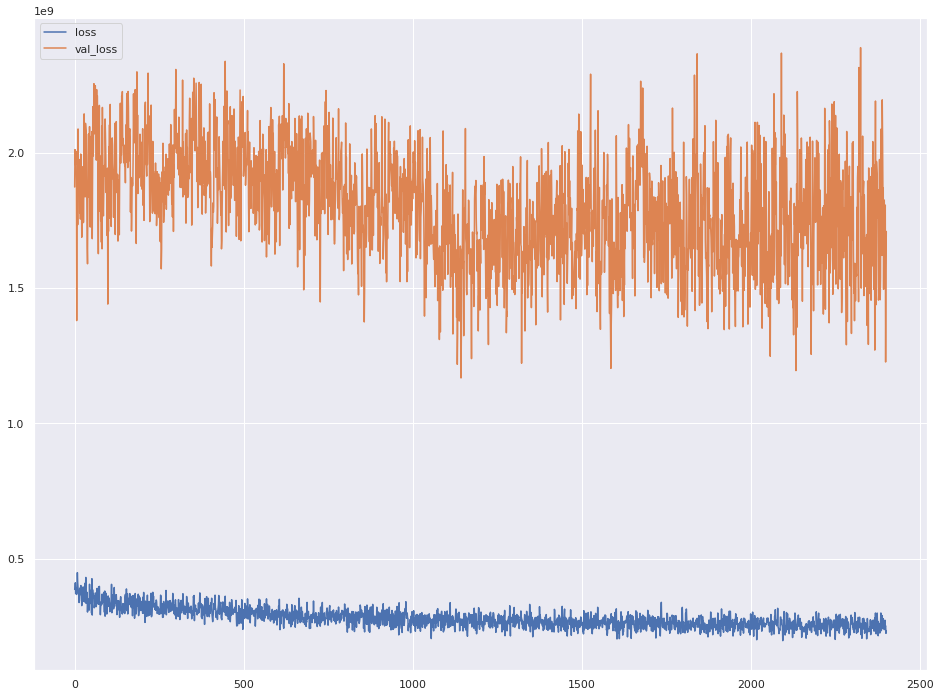

In [42]:
plot_history(history, offset=100)

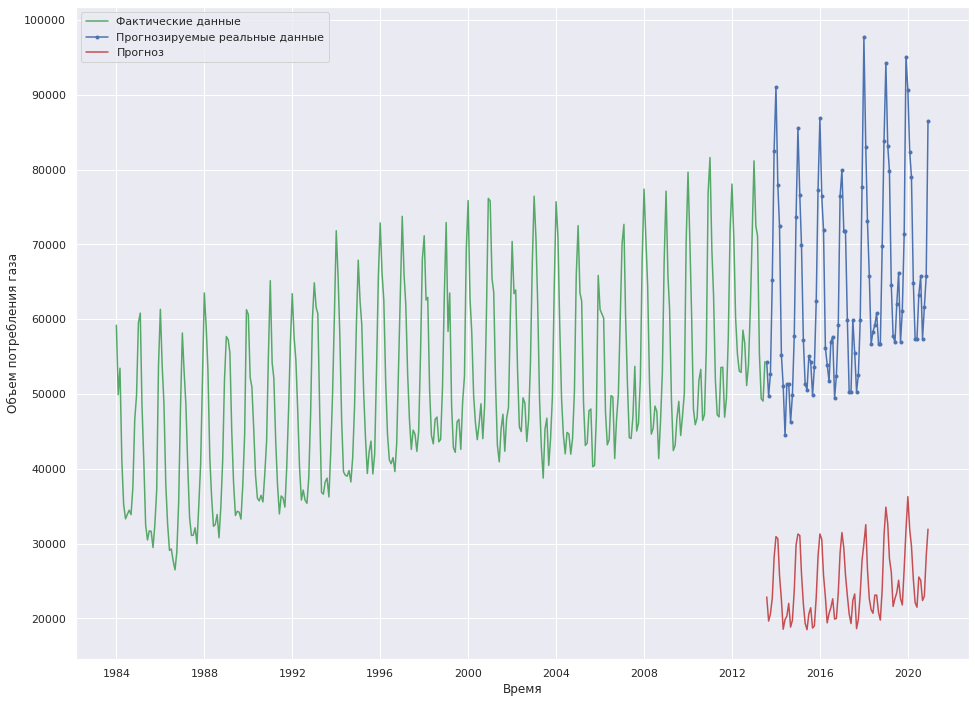

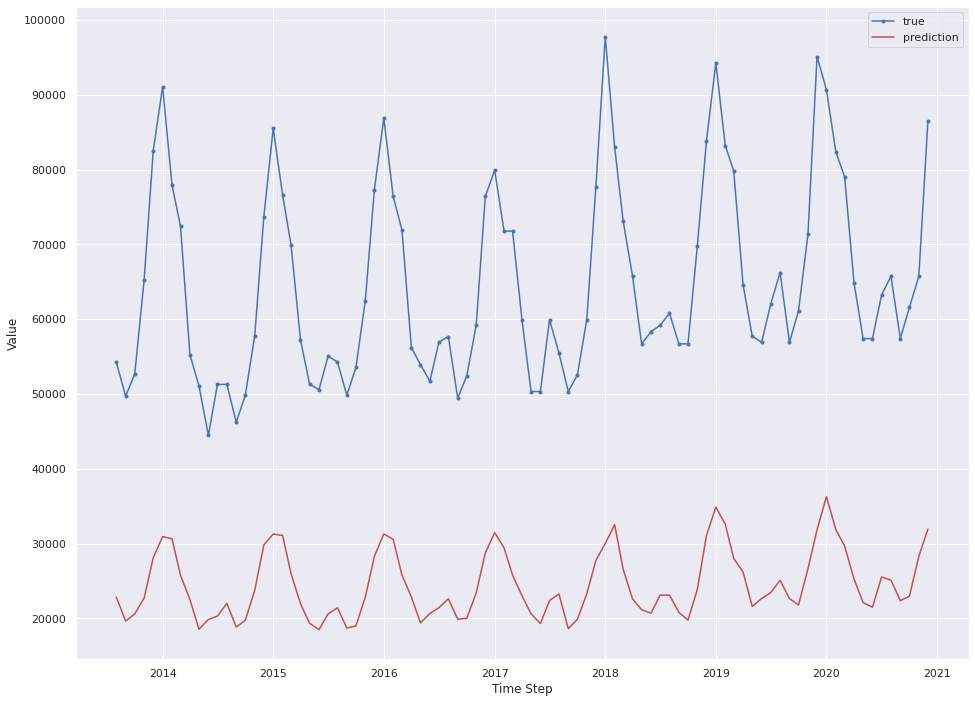

In [43]:
results = forecast(model)

In [39]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

2358.8535

### LSTM

In [31]:
model = tf.keras.models.Sequential([
 tf.keras.layers.LSTM(12, return_sequences=False),
 tf.keras.layers.Dense(1),
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam())
history = model.fit(dataset, 
                    validation_data=validation_ds,
                    epochs=2500, verbose=1)

# model.summary()

Epoch 1/2500


ValueError: in user code:

    /home/ab/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /home/ab/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/ab/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/ab/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/ab/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/ab/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /home/ab/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:795 train_step
        y_pred = self(x, training=True)
    /home/ab/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/ab/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/input_spec.py:215 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_4 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, None)


# Addendum

In [23]:
# tf.keras.backend.clear_session()
# model = tf.keras.models.Sequential([
#  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
#  strides=1, padding='causal',
#  activation='relu',
#  input_shape=[None, 1]),
#  tf.keras.layers.LSTM(32, return_sequences=True),
#  tf.keras.layers.LSTM(32, return_sequences=True),
#  tf.keras.layers.Dense(30, activation='relu'),
#  tf.keras.layers.Dense(10, activation='relu'),
#  tf.keras.layers.Dense(1),
# ])
# model.summary()